# <font color="#8333ff">Projet 6 : Détectez des faux billets</font>

### Dans ce projet, il est question de predire la veracité d'un billet de banque à l'aide d'une régression logistique.

L' échantillon contient 170 billets, caractérisés par :

- la diagonale ;
- la hauteur gauche ;
- la hauteur droite;
- la marge basse ;
- la marge haute ;
- la longueur ;

La variable is_genuine est la variable qui indique si le billet est un vrai (1) ou pas (0).

#  <font color="#8333ff">Sommaire <a id="sommaire"></a>
0. **[<font color="8333ff">Mission 0 : Analyse univariée et bivariée](#mission0)<br/>**
   0.1 [<font color="black">Moyenne par variable](#moyennevar)<br/>
   0.2 [<font color="black">Distribution VRAI /FAUX](#distribution)<br/>
   0.3 [<font color="black">Corrélations linéaires entre variables](#correlation)<br/>
1. **[<font color="8333ff">Mission 1 : Analyse en composantes principales de l'échantillon](#mission1)<br/>**
   1.1 [<font color="black">Selection des variables pour l'ACP](#varacp)<br/>
   1.2 [<font color="black">Eboulis des valeurs propres](#eboulis)<br/>
   1.3 [<font color="black">Représentation des variables par le cercle des corrélations et projection des individus](#acplot)<br/>
   1.4 [<font color="black">Analyse de la contribution des variables à chaque axe](#contrivar)<br/>
   1.5 [<font color="black">Qualite de representation des individus](#qualite)<br/>
2. **[<font color="8333ff">Mission 2 : Clustering K-means](#mission2)<br/>**
3. **[<font color="8333ff">Mission 3-A : Regression logistique sur données brutes](#mission3a)<br/>**
   3.1 [<font color="black">Modelisation avec package Stats model sur les 3 variables](#sm1)<br/>
   3.2 [<font color="black">Préparation de l'échantillon pour regression logistique Sikit learn](#prepaskt1)<br/>
   3.3 [<font color="black">Exécution de la régression logistique sur les données d'apprentissage](#reglog1)<br/>
   3.4 [<font color="black">Prédiction sur l'échantillon test](#predtestlog1)<br/>
   3.5 [<font color="black">Prédiction sur l'échantillon train](#predtrainlog1)<br/>
   3.6 [<font color="black">Recherche des billets mal prédits](#malpredits1)<br/>
4. **[<font color="8333ff">Mission 3-B : Regression logistique sur données ACP](#mission3b)<br/>**
   4.1 [<font color="black">Modelisation avec package Stats model sur les composantes principales](#sm2)<br/>
   4.2 [<font color="black">Préparation de l'échantillon pour regression logistique Sikit learn](#prepaskt2)<br/>
   4.3 [<font color="black">Exécution de la régression logistique sur les données d'apprentissage](#reglog2)<br/>
   4.4 [<font color="black">Prédiction sur l'échantillon test](#predtestlog2)<br/>
   4.5 [<font color="black">Prédiction sur l'échantillon train](#predtrainlog2)<br/>
   4.6 [<font color="black">Recherche des billets mal prédits](#malpredits2)<br/>

Chargement des librairies nécessaires :

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import preprocessing
from scipy import stats
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing
import seaborn as sns
from functions import *
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.cluster import KMeans


In [150]:
# import de l'échantillon
data = pd.read_csv("notes.csv")
data.iloc[0:100,0] = 1
data.iloc[100:,0] = 0
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.67,103.74,103.70,4.01,2.87,113.29
2,1,171.83,103.76,103.76,4.40,2.88,113.84
3,1,171.80,103.78,103.65,3.73,3.12,113.63
4,1,172.05,103.70,103.75,5.04,2.27,113.55


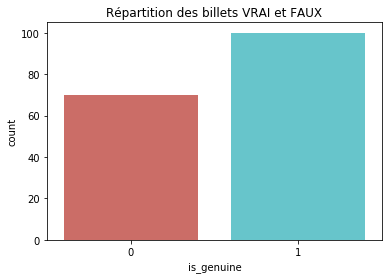

In [22]:
# Répartition effectif billet VRAI et billet FAUX
sns.countplot(x='is_genuine',data=data, palette ='hls')
plt.title('Répartition des billets VRAI et FAUX')
plt.show()

## [<font color="#8333ff"> Mission 0 : Analyse univariée et bivariée](#sommaire)
<a id="mission0" a>

### [<font color="black"> Moyenne par variable](#sommaire)
<a id="moyennevar" a>

In [23]:
# Moyenne par variable
data.groupby('is_genuine').mean()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
0,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
1,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200


**Premiers constats :**

- Les marges (hautes et surtout basses) sont en moyenne plus élevées pour les billets FAUX que les billets VRAIS

- Les billets VRAI sont en moyenne plus longs que les billets FAUX

### [<font color="black"> Distribution VRAI /FAUX](#sommaire)
<a id="distribution" a>

In [24]:
sns.set_context('notebook', font_scale = 1)

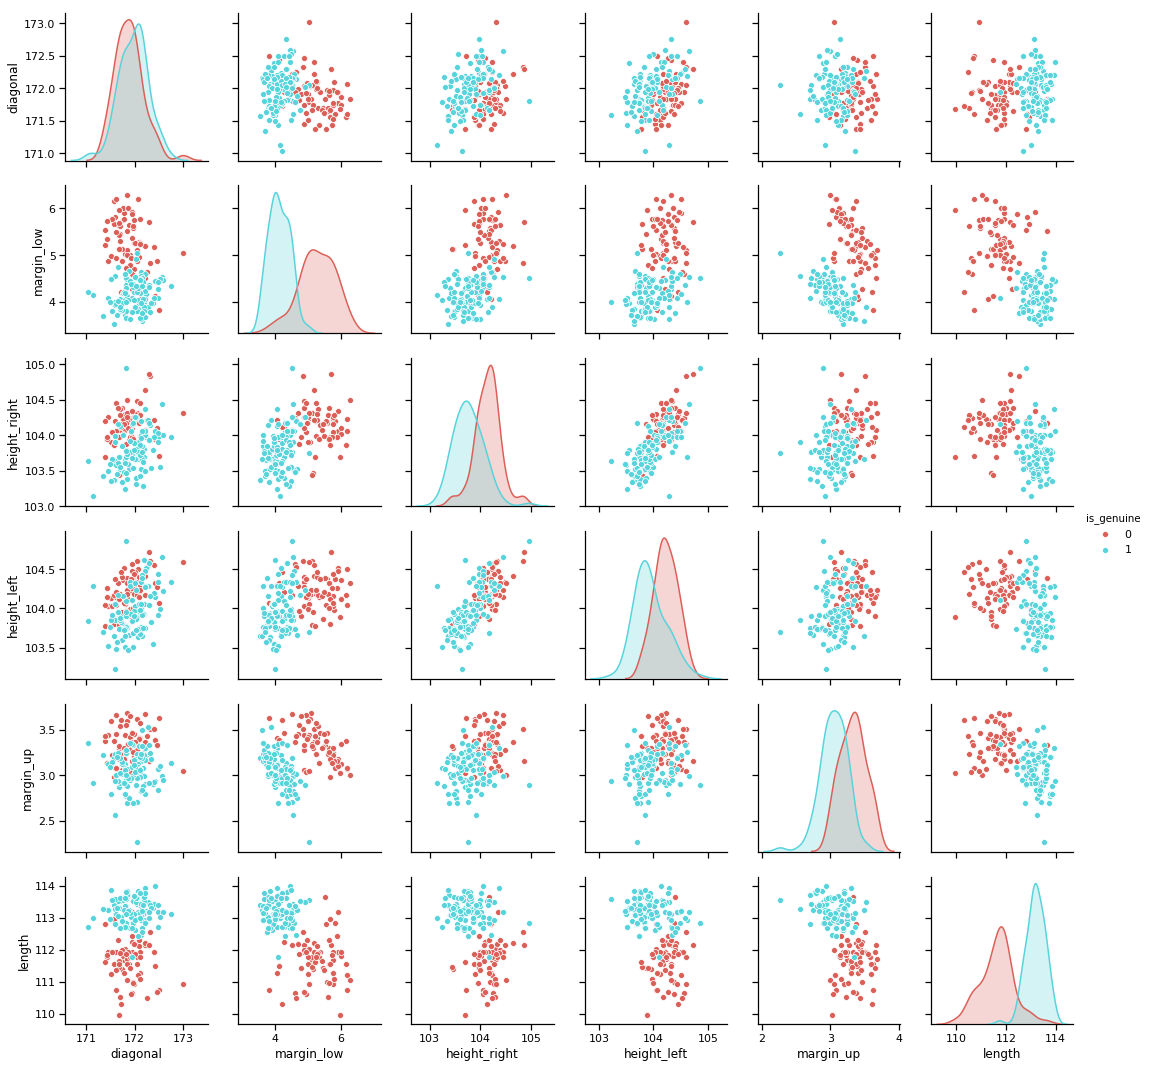

In [151]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.pairplot(data, hue='is_genuine',vars =data[['diagonal','margin_low','height_right','height_left', 'margin_up', 'length']] , palette ='hls', )
sns.set_context(font_scale = 2)

**Constat :** La variable lenght est clivante

### [<font color="black"> Corrélations linéaires entre variables](#sommaire)
<a id="correlation" a>

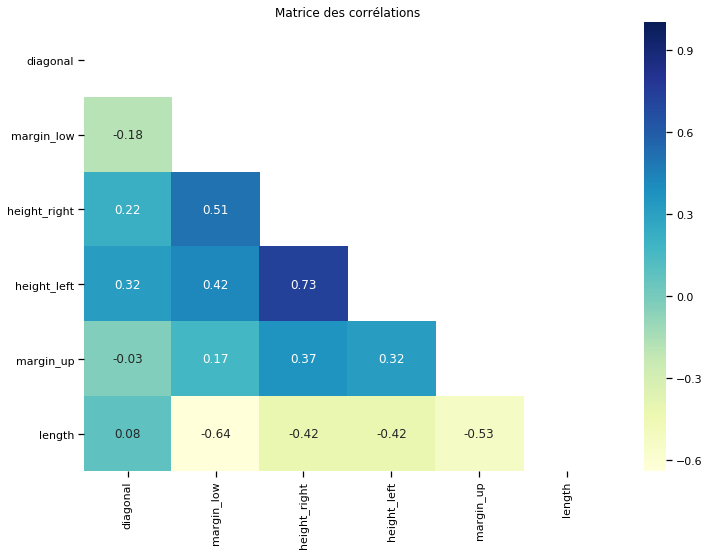

In [48]:
data_corr = data[['diagonal','margin_low','height_right','height_left', 'margin_up', 'length']].corr()
mask=np.triu(np.ones(data_corr.shape)).astype(np.bool)
# create heatmap
sns.heatmap(round(data_corr,2), annot=True, cmap="YlGnBu" ,fmt='g',mask =mask)
plt.tight_layout()
plt.title('Matrice des corrélations', y=1.1)
plt.gcf().set_size_inches(12, 10)

**Constats :** 
- Les variables height_right et height_left sont bien corrélées

- La variable lenght est anti-corrélée à toutes les autres variables 

## [<font color="#8333ff"> Mission 1 :  Analyse en composantes principales de l'échantillon](#sommaire)
<a id="mission1" a> 

### [<font color="black"> Selection des variables pour l'ACP](#sommaire)
<a id="varacp" a> 

In [152]:
# Toutes les variables en entrée
data_pca = data[['diagonal','margin_low','height_right','height_left', 'margin_up', 'length']]
data_pca.head()

,diagonal,margin_low,height_right,height_left,margin_up,length
0,171.81,4.52,104.95,104.86,2.89,112.83
1,171.67,4.01,103.70,103.74,2.87,113.29
2,171.83,4.40,103.76,103.76,2.88,113.84
3,171.80,3.73,103.65,103.78,3.12,113.63
4,172.05,5.04,103.75,103.70,2.27,113.55


### [<font color="black">Eboulis des valeurs propres](#sommaire)
<a id="eboulis" a> 

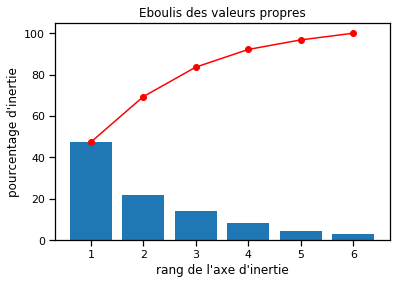

In [155]:
# choix du nombre de composantes à calculer
n_comp = 6

# préparation des données pour l'ACP
X = data_pca.values
names = data.index
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

**Décision :** En selectionnant les 4 premières composantes principales, nous conservons 90% de l'information.

### [<font color="black">Représentation des variables par le cercle des corrélations et projection des individus](#sommaire)
<a id="acplot" a> 

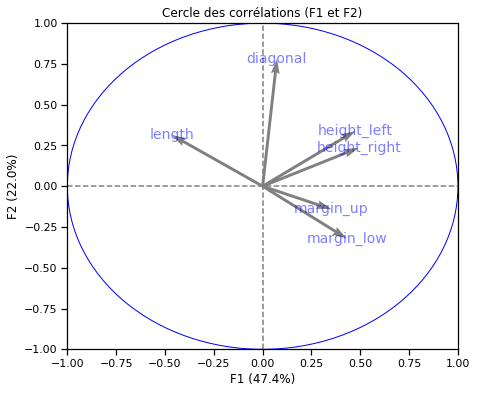

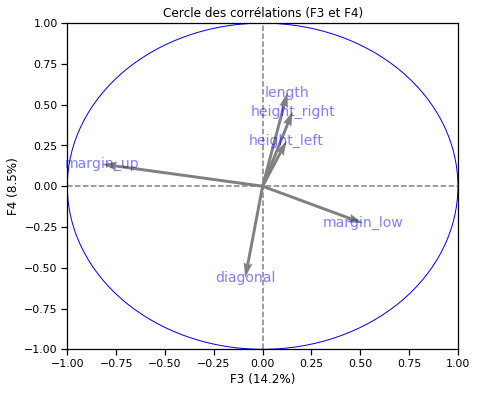

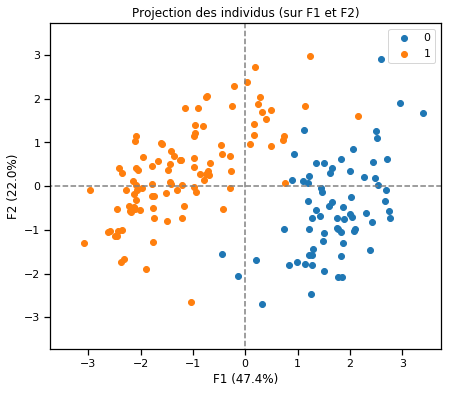

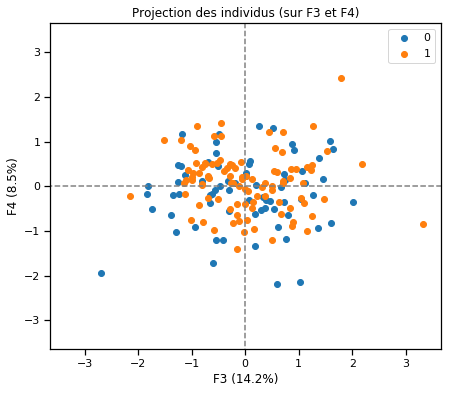

In [50]:
# choix du nombre de composantes à calculer
n_comp = 4

# préparation des données pour l'ACP
X = data_pca.values
names = data.index
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))


# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = data.is_genuine)
display_factorial_planes(X_projected, n_comp, pca, [(2,3)],illustrative_var = data.is_genuine)

plt.show()

**Constats :**
- Le plan F1,F2 permet de facilement cliver les individus selon VRAI / FAUX. </br>
- Les billets FAUX ont tendance à avoir des valeurs fortes pour F1 </br>
- Les billets VRAI ont tendance à avoir des valeurs faibles pour F1 </br>
- Les corrélations constatées en premières partie se remarquent sur F1 F2

- Sur le plan F3, F4, les individus ne sont pas séparés, il n'est pas utile de l'utiliser pour la suite de l'expérience </br>

In [32]:
## 3D  : https://matplotlib.org/3.1.3/gallery/mplot3d/scatter3d.html

### [<font color="black">Analyse de la contribution des variables à chaque axe](#sommaire)
<a id="contrivar" a> 

In [33]:
contri_var = pd.DataFrame(data = pcs,index = ['principal component 1', 'principal component 2',
                                 'principal component 3', 'principal component 4' ], columns = ['diagonal', 'height_right','height_left', 'margin_low',
                                 'margin_up', 'length']).T
contri_var.sort_values('principal component 1', ascending = False)

,principal component 1,principal component 2,principal component 3,principal component 4
height_left,0.491821,0.235543,0.153830,0.458938
margin_low,0.475502,0.339250,0.122760,0.278046
height_right,0.431027,-0.320537,0.512808,-0.226528
margin_up,0.352540,-0.141120,-0.821149,0.135340
diagonal,0.073275,0.779639,-0.088894,-0.559732
length,-0.465373,0.314536,0.126913,0.573703


### [<font color="black">Qualite de representation des individus](#sommaire)
<a id="qualite" a> 

In [137]:
# Contribution des individus à chaque axe

principalDf = pd.DataFrame(data = X_projected,index = data.index
             ,columns = ['principal component 1', 'principal component 2'])
principalDf = pd.merge(principalDf,data,left_index=True, right_index=True)
principalDf = principalDf.iloc[:,0:3]
principalDf.sort_values('principal component 1', ascending = False).head()

,principal component 1,principal component 2,is_genuine
151,2.761911,0.363923,0
153,2.351602,-0.297808,0
142,2.278761,0.245586,0
158,2.229933,-0.645775,0
146,2.045982,-0.076842,0


In [35]:
# Contribution des individus dans l'inertie totale
di = np.sum(X_projected**2,axis=1)
pd.DataFrame({'ID':data.index,'d_i':di}).sort_values('d_i',ascending = False).head()

,ID,d_i
166,166,20.290967
4,4,17.664926
122,122,16.600749
0,0,16.313964
112,112,13.925836


In [36]:
# Calcul des cosinus 
cos2 = X_projected**2
for j in range(n_comp):
 cos2[:,j] = cos2[:,j]/di

qualite = pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2],'COS2_4':cos2[:,3]})
qualite.sort_values('COS2_1',ascending = False ).head()

,id,COS2_1,COS2_2,COS2_3,COS2_4
99,99,0.983745,0.014867,3.672806e-07,0.001387
143,143,0.982254,0.007652,6.570097e-06,0.010087
46,46,0.970411,0.003371,1.621350e-03,0.024596
132,132,0.960183,0.013488,2.356167e-02,0.002767
111,111,0.959910,0.030944,8.135470e-03,0.001011


In [37]:
# Jointure sur contribution et qualtie de representation
qual_contri = pd.merge(qualite,principalDf,left_index = True, right_index = True)
qual_contri = qual_contri.loc[:,['COS2_1','COS2_2','principal component 1','principal component 2']].sort_values('principal component 1', ascending = False)

qual_contri = pd.merge(qual_contri,data,left_index=True, right_index=True)
qual_contri = qual_contri.iloc[:,0:5]
qual_contri.sort_values('COS2_1',ascending= False).head()

,COS2_1,COS2_2,principal component 1,principal component 2,diagonal
99,0.983745,0.014867,-1.783442,-0.219247,171.81
143,0.982254,0.007652,2.265472,0.199957,172.00
46,0.970411,0.003371,-1.307882,-0.077086,171.85
132,0.960183,0.013488,2.019419,-0.239349,171.94
111,0.959910,0.030944,1.991733,0.357605,172.09


## [<font color="#8333ff"> Mission 2 : Clustering K-means](#sommaire)
<a id="mission2" a> 

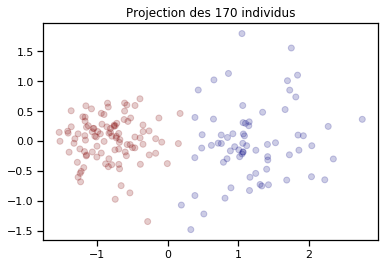

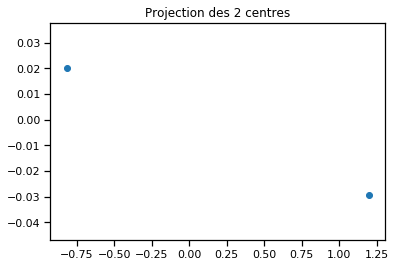

In [64]:
# Nombre de clusters souhaités
n_clust = 2

# préparation des données pour le clustering
X = data_pca.values

# Centrer et réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters= n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=2).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus".format(X_projected.shape[0]))

plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres".format(len(centroids)))
plt.show()

In [65]:
# Billets mal predits par le Kmeans
km = pd.DataFrame({"Numero de billet" : data.index, "K-means cluster" : clusters, "is_genuine" : data.is_genuine})
km.head()

,Numero de billet,K-means cluster,is_genuine
0,0,1,1
1,1,1,1
2,2,1,1
3,3,1,1
4,4,1,1


Text(0.5, 12.5, 'Predicted label')

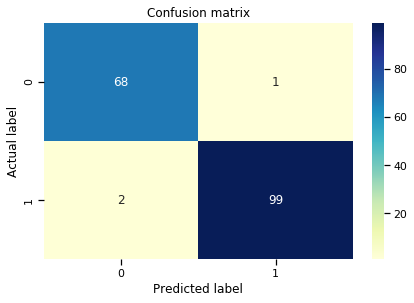

In [66]:
# Confrontation entre Y obs. sur l’éch. test et la prédiction Kmeans
cm_km = metrics.confusion_matrix(km['K-means cluster'],km['is_genuine'])
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cm_km), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
# Les billets mal prédits 
print(km.loc[(km['K-means cluster'] == 0) & (km['is_genuine'] == 1)])
print(km.loc[(km['K-means cluster'] == 1) & (km['is_genuine'] == 0)])

    Numero de billet  K-means cluster  is_genuine
69                69                0           1
     Numero de billet  K-means cluster  is_genuine
102               102                1           0
118               118                1           0


## [<font color="#8333ff"> Mission 3-A : Regression logistique sur données brutes](#sommaire)
<a id="mission3a" a>  

Import des librairies nécessaires

In [70]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### [<font color="black">Modelisation avec package Stats model sur les 3 variables](#sommaire)
<a id="sm1" a> 

Nous profitons du package stats models pour un summary :

Initalement, nous mettons en entrée les 6 variables et nous vérifions les p-value associée à chacune des variables.

Avec 6 variables, toutes les p-values sont bien supérieures à 5 %, on supprime donc progressivement la variable pour laquelle la p-value est la plus forte.
Jusqu'à obtenir que des variables aux p-values toutes inférieures à 5 %

In [165]:
y = data['is_genuine']
X = data[['diagonal','margin_low', 'length']]
print(len(y))
print(data.shape)
logit_model=sm.Logit(y.astype(float),X.astype(float))
result=logit_model.fit(method='bfgs')
print(result.summary2())

170
(170, 7)
Optimization terminated successfully.
         Current function value: 0.029926
         Iterations: 33
         Function evaluations: 37
         Gradient evaluations: 37
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.956     
Dependent Variable: is_genuine       AIC:              16.1748   
Date:               2020-03-22 22:06 BIC:              25.5822   
No. Observations:   170              Log-Likelihood:   -5.0874   
Df Model:           2                LL-Null:          -115.17   
Df Residuals:       167              LLR p-value:      1.5487e-48
Converged:          1.0000           Scale:            1.0000    
------------------------------------------------------------------
             Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
------------------------------------------------------------------
diagonal     -4.6736    1.6533  -2.8269  0.0047   -7.9139  -1.4333
margin_low  -12.2059    4.2043  -2.9032  0.00

### [<font color="black">Préparation de l'échantillon pour regression logistique Sikit learn](#sommaire)
<a id="prepaskt1" a> 

In [171]:
# Selection des 3 variables
y = data[['is_genuine']].values
X = data[['diagonal','margin_low', 'length']].values

# Split de l'échantillon (80 % train et 20% test), stratifies 
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.2,random_state=0,stratify=y)
print('Echantillon de train',X_train.shape,y_train.shape)
print ('Echantillon de test',X_test.shape,y_test.shape)



Echantillon de train (136, 3) (136, 1)
Echantillon de test (34, 3) (34, 1)


### [<font color="black">Exécution de la régression logistique sur les données d'apprentissage](#sommaire)
<a id="reglog1" a> 

In [176]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,np.ravel(y_train,order='C'))

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: L

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9852941176470589


/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: L

In [177]:
logreg2=LogisticRegression(C=0.1,penalty="l2",solver='lbfgs')
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))
print("Les coefficients sont :",logreg2.coef_)

score 1.0
Les coefficients sont : [[-0.65449431 -1.21990061  1.05378449]]


/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### [<font color="black">Prédiction sur l'échantillon test](#sommaire)
<a id="predtestlog1" a> 

In [79]:
#calcul des prédictions
y_pred = logreg2.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns=['Prédiction reg log'])

#calcul des probas d'affectation sur ech. test
probas = logreg2.predict_proba(X_test)
probas = pd.DataFrame(probas,columns=['Probalité négative','Probalité positive'])


pred_test = pd.merge(y_pred,probas,left_index=True, right_index=True )
pred_test.sort_values('Probalité négative',ascending = False)

,Prédiction reg log,Probalité négative,Probalité positive
20,0,0.961237,0.038763
8,0,0.952931,0.047069
17,0,0.919886,0.080114
23,0,0.881050,0.118950
1,0,0.837602,0.162398
27,0,0.800442,0.199558
10,0,0.785471,0.214529
24,0,0.770957,0.229043
0,0,0.724159,0.275841
31,0,0.702948,0.297052


Text(0.5, 12.5, 'Predicted label')

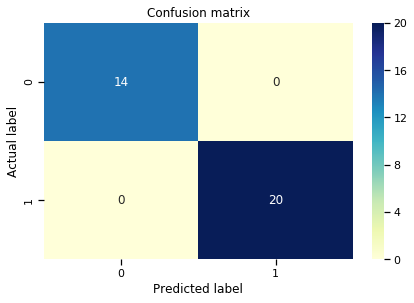

In [80]:
# confrontation entre Y obs. sur l’éch. test et la prédiction
cm = metrics.confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### [<font color="black">Prédiction sur l'échantillon train](#sommaire)
<a id="predtrainlog1" a> 

Text(0.5, 12.5, 'Predicted label')

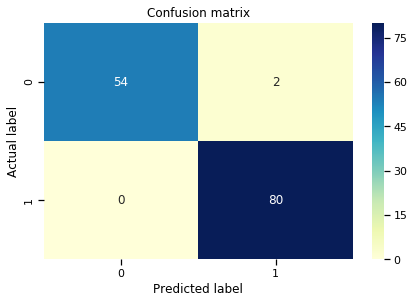

In [81]:
y_pred_train = logreg2.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train,columns=['Prédiction reg log train'])

#calcul des probas d'affectation sur ech. test
probas_train = logreg2.predict_proba(X_train)
probas_train = pd.DataFrame(probas_train,columns=['Probalité négative','Probalité positive'])

pred_train = pd.merge(y_pred_train,probas_train,left_index=True, right_index=True )

# confrontation entre Y obs. sur l’éch. test et la prédiction
cm_train = metrics.confusion_matrix(y_train ,y_pred_train)
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cm_train), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### [<font color="black">Recherche des billets mal prédits ](#sommaire)
<a id="malpredits1" a> 

TO DO 

## [<font color="#8333ff"> Mission 3-B : Régression logistique sur composantes principales de l'ACP](#sommaire)
<a id="mission3b" a>    

### [<font color="black">Modelisation avec package Stats model sur les compostantes ACP](#sommaire)
<a id="sm2" a> 

In [91]:
y = principalDf['is_genuine']
X = principalDf[['principal component 1','principal component 2']]

print(len(y))
print(principalDf.shape)
logit_model=sm.Logit(y.astype(float),X.astype(float))
result=logit_model.fit(method='bfgs')
print(result.summary2())


170
(170, 3)
Optimization terminated successfully.
         Current function value: 0.043586
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.936     
Dependent Variable:   is_genuine         AIC:                18.8193   
Date:                 2020-03-22 17:01   BIC:                25.0909   
No. Observations:     170                Log-Likelihood:     -7.4096   
Df Model:             1                  LL-Null:            -115.17   
Df Residuals:         168                LLR p-value:        8.5448e-49
Converged:            1.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                       Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
principal component 1 -10.1008   3.1506 -3.2059 0.00

### [<font color="black">Préparation de l'échantillon pour regression logistique Sikit learn](#sommaire)
<a id="prepaskt2" a> 

In [92]:
# Split de l'échantillon (80 % train et 20% test), stratifies 
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.2,random_state=0,stratify=y)
print('Echantillon de train',X_train.shape,y_train.shape)
print ('Echantillon de test',X_test.shape,y_test.shape)

Echantillon de train (136, 2) (136,)
Echantillon de test (34, 2) (34,)


### [<font color="black">Exécution de la régression logistique sur les données d'apprentissage](#sommaire)
<a id="reglog2" a> 

In [148]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.9779411764705882


/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [143]:
logreg2=LogisticRegression(C=0.001,penalty="l2",solver='lbfgs')
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))
print("Les coefficients sont :",logreg2.coef_)

score 0.5882352941176471
Les coefficients sont : [[-0.06313727  0.00199866]]


### [<font color="black">Prédiction sur l'échantillon test](#sommaire)
<a id="predtestlog2" a> 

In [95]:
#calcul des prédictions
y_pred = logreg2.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns=['Prédiction reg log'])

#calcul des probas d'affectation sur ech. test
probas = logreg2.predict_proba(X_test)
probas = pd.DataFrame(probas,columns=['Probalité négative','Probalité positive'])


pred_test = pd.merge(y_pred,probas,left_index=True, right_index=True )
pred_test.sort_values('Probalité négative',ascending = False)

,Prédiction reg log,Probalité négative,Probalité positive
0,0,0.532607,0.467393
32,0,0.529616,0.470384
10,0,0.527453,0.472547
7,0,0.525637,0.474363
22,0,0.525429,0.474571
18,0,0.519499,0.480501
30,0,0.517122,0.482878
13,0,0.513970,0.486030
26,0,0.511704,0.488296
23,0,0.509805,0.490195


Text(0.5, 12.5, 'Predicted label')

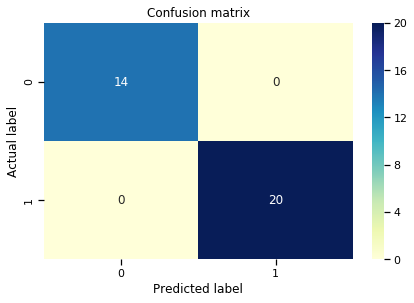

In [96]:
# confrontation entre Y obs. sur l’éch. test et la prédiction
cm = metrics.confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### [<font color="black">Prédiction sur l'échantillon train](#sommaire)
<a id="predtrainlog2" a> 

Text(0.5, 12.5, 'Predicted label')

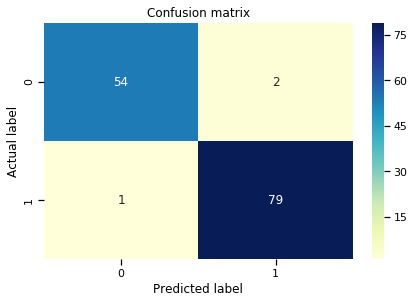

In [101]:
y_pred_train = logreg2.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train,columns=['Prédiction reg log train'])

#calcul des probas d'affectation sur ech. test
probas_train = logreg2.predict_proba(X_train)
probas_train = pd.DataFrame(probas_train,columns=['Probalité négative','Probalité positive'])

pred_train = pd.merge(y_pred_train,probas_train,left_index=True, right_index=True )

# confrontation entre Y obs. sur l’éch. test et la prédiction
cm_train = metrics.confusion_matrix(y_train ,y_pred_train)
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cm_train), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### [<font color="black">Recherche des billets mal prédits ](#sommaire)
<a id="malpredits2" a> 


In [108]:
y_pred_final = logreg2.predict(X)
y_pred_final = pd.DataFrame(y_pred_final,columns=['Prédiction reg log final'])

In [121]:
cf_final = pd.merge(principalDf,y_pred_final,left_index=True, right_index=True)
cf_final = cf_final.iloc[:,2:4]
# Les billets mal prédits 
print(cf_final.loc[(cf_final['Prédiction reg log final'] == 0) & (cf_final['is_genuine'] == 1)])
print(cf_final.loc[(cf_final['Prédiction reg log final'] == 1) & (cf_final['is_genuine'] == 0)])

    is_genuine  Prédiction reg log final
69           1                         0
     is_genuine  Prédiction reg log final
102           0                         1
118           0                         1


### Import fichier test

In [103]:
example = pd.read_csv("example.csv")
test = example[['diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length']].values
example

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5
